Epoch 1/5
1875/1875 [==============================] - 73s 31ms/step - loss: 0.1364 - accuracy: 0.9582
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0458 - accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0338 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0252 - accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0204 - accuracy: 0.9936


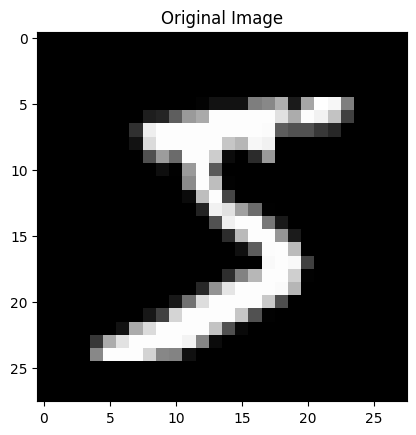

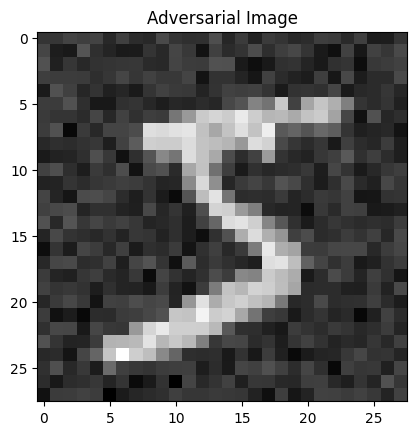

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'numpy.uint8'>"})

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset
(train_images, train_labels), (_, _) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255

# Create a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Load a sample image for testing
sample_image = train_images[0:1]

# Display the original image
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.show()

# Generate an adversarial image (for educational purposes only)
perturbation = np.random.normal(loc=0, scale=0.1, size=sample_image.shape)
adversarial_image = sample_image + perturbation

# Display the adversarial image
plt.imshow(adversarial_image.reshape(28, 28), cmap='gray')
plt.title("Adversarial Image")
plt.show()

# Evaluate the model on the original and adversarial images
original_accuracy = model.evaluate(sample_image, [train_labels[0]], verbose=0)[1]
adversarial_accuracy = model.evaluate(adversarial_image, [train_labels[0]], verbose=0)[1]

print(f"Original Image Accuracy: {original_accuracy}")
print(f"Adversarial Image Accuracy: {adversarial_accuracy}")
